In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy as sp
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance
from collections import defaultdict

# k-Means

In [2]:
def dist_euclidian(a,b):
    return np.linalg.norm(a-b)

In [3]:
def purity(cm):
    return cm.max(axis=1).sum() / cm.sum()

In [4]:
def dunn_index(data, centroids):
    dist_objects=sp.spatial.distance.cdist(data, data).flatten()
    dist_centroids=sp.spatial.distance.cdist(centroids, centroids).flatten()
    dist_cen=[]   
    dist_obj=[]
    for i in range(dist_objects.shape[0]):
        if(dist_objects[i]!=0):
            dist_obj.append(dist_objects[i])
    for i in range(dist_centroids.shape[0]):
        if(dist_centroids[i]!=0):
            dist_cen.append(dist_centroids[i])
    dist_obj=np.array(dist_obj)
    dist_cen=np.array(dist_cen)
    min_c=np.amin(dist_cen)
    max_x=np.amax(dist_obj)
    return min_c/max_x

In [5]:
def k_means(k, data):
    eps=0
    num_objects, num_features = data.shape
    centroids = data[np.random.randint(0, num_objects - 1, size=k)]
    centroids_old = np.zeros(centroids.shape)
    belongs_to = np.zeros((num_objects, 1))
    norm = dist_euclidian(centroids, centroids_old)
    while norm > eps:
        norm = dist_euclidian(centroids, centroids_old)
        centroids_old = centroids
        for index_object, curr_object in enumerate(data):
            dist_vec = np.zeros((k, 1))
            for index_centroid, centroid in enumerate(centroids):
                dist_vec[index_centroid] = dist_euclidian(centroid,
                                              curr_object)
            belongs_to[index_object, 0] = np.argmin(dist_vec)
        tmp_centroids = np.zeros((k, num_features))
        for index in range(len(centroids)):
            objects_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            centroid = np.mean(data[objects_close], axis=0)
            tmp_centroids[index, :] = centroid
        centroids = tmp_centroids
    return centroids, belongs_to

# Blobs&Dunn_index

# k=2

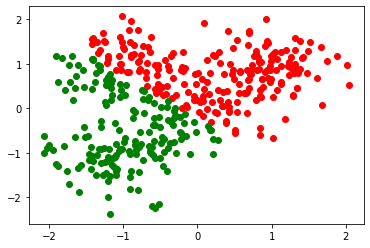

In [6]:
k=2
colours = ['r', 'g']
data = pd.read_csv("blobs.csv").values
centroids, clusters = k_means(k, data)
fig, ax = plt.subplots()
for index in range(data.shape[0]):
    objects_close = [i for i in range(len(clusters)) if clusters[i] == index]
    for object_index in objects_close:
        ax.plot(data[object_index][0], data[object_index][1], (colours[index] + 'o'))

In [7]:
dunn_ind=dunn_index(data, centroids)
print(f'dunn_index={dunn_ind}')

dunn_index=0.3673068775175083


# k=3

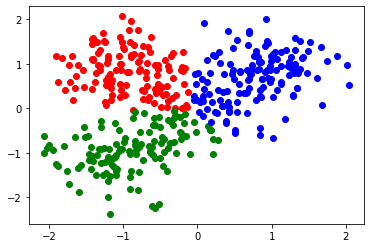

In [8]:
k=3
colours = ['r', 'g', 'b']
data = pd.read_csv("blobs.csv").values
centroids, clusters = k_means(k, data)
fig, ax = plt.subplots()
for index in range(data.shape[0]):
    objects_close = [i for i in range(len(clusters)) if clusters[i] == index]
    for object_index in objects_close:
        ax.plot(data[object_index][0], data[object_index][1], (colours[index] + 'o'))

In [9]:
dunn_ind=dunn_index(data, centroids)
print(f'dunn_index={dunn_ind}')

dunn_index=0.3468835706269542


# k=4

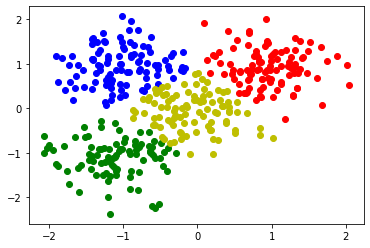

In [10]:
k=4
colours = ['r', 'g', 'b', 'y']
data = pd.read_csv("blobs.csv").values
centroids, clusters = k_means(k, data)
fig, ax = plt.subplots()
for index in range(data.shape[0]):
        objects_close = [i for i in range(len(clusters)) if clusters[i] == index]
        for object_index in objects_close:
            ax.plot(data[object_index][0], data[object_index][1], (colours[index] + 'o'))

In [11]:
dunn_ind=dunn_index(data, centroids)
print(f'dunn_index={dunn_ind}')

dunn_index=0.2871445964858464


# k=5

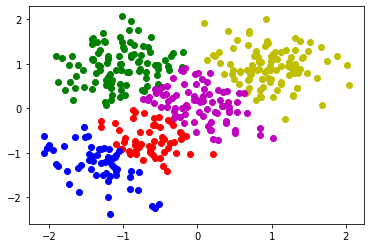

In [12]:
k=5
colours = ['r', 'g', 'b', 'y', 'm']
data = pd.read_csv("blobs.csv").values
centroids, clusters = k_means(k, data)
fig, ax = plt.subplots()
for index in range(data.shape[0]):
        objects_close = [i for i in range(len(clusters)) if clusters[i] == index]
        for object_index in objects_close:
            ax.plot(data[object_index][0], data[object_index][1], (colours[index] + 'o'))

In [13]:
dunn_ind=dunn_index(data, centroids)
print(f'dunn_index={dunn_ind}')

dunn_index=0.18496458101304258


# Cancer&Purity

In [14]:
data_open = pd.read_csv("cancer.csv")
data = data_open.loc [1:10000] 
x = data[data.columns.difference(['label'])].values
y = data.label
for k in range (2,11):
    centroids, clusters = k_means(k, x)
    cm = confusion_matrix(y.apply(lambda x: 1 if x == 'M' else 0), clusters).T
    purity_res=purity(cm)
    print("k=", k, ": purity =", purity_res)


k= 2 : purity = 0.8538732394366197
k= 3 : purity = 0.8732394366197183
k= 4 : purity = 0.8345070422535211
k= 5 : purity = 0.8908450704225352
k= 6 : purity = 0.8767605633802817
k= 7 : purity = 0.8908450704225352
k= 8 : purity = 0.8908450704225352
k= 9 : purity = 0.9084507042253521
k= 10 : purity = 0.6285211267605634


/home/adeliapopova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adeliapopova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


# Normilized_Cancer&Purity

In [15]:
scaler = StandardScaler()
data_open = pd.read_csv("cancer.csv")
data = data_open.loc [1:10000] 
x = data[data.columns.difference(['label'])].values
x_scaled=scaler.fit_transform(x)
y = data.label
for k in range (2,11):
    centroids, clusters = k_means(k, x_scaled)
    cm = confusion_matrix(y.apply(lambda x: 1 if x == 'M' else 0), clusters).T
    purity_res=purity(cm)
    print("k=", k, ": purity =", purity_res)

k= 2 : purity = 0.9119718309859155
k= 3 : purity = 0.8785211267605634
k= 4 : purity = 0.8820422535211268
k= 5 : purity = 0.8732394366197183
k= 6 : purity = 0.8679577464788732
k= 7 : purity = 0.9137323943661971
k= 8 : purity = 0.6285211267605634


/home/adeliapopova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adeliapopova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


k= 9 : purity = 0.9278169014084507
k= 10 : purity = 0.9330985915492958


# DBSCAN

Прочитала, что праметр MinPts можно считать как натуральный логарифм от количества точек в датасете(есть такая эвристика). Чтобы выбрать эпсилон, я построила кривую, которая показывает расстояние от каждой точки до ее ближайшего соседа. Эпсилона будет равен значению расстояния в точке, где кривизна максимальна.(из графика видно, что это примерно 0.2). Обычно эти методы используются для поиска оптимальных параметров, но я решила, что исходя из вида датасета, количество кластеров, равное 4, является в каком-то смысле оптимальным, поэтому применила их. 



In [16]:
def DBScan(data, eps, MinPts):
    clusters = [0]*data.shape[0]  
    cluster = 0
    for i in range(0,data.shape[0]):
        if not (clusters[i] == 0):
            continue
        NeighborPts = regionQuery(data, i, eps)
        if len(NeighborPts) < MinPts:
            clusters[i] = -1    
        else: 
            cluster += 1
            growCluster(data, clusters, i, NeighborPts, cluster, eps, MinPts)
    return clusters


def growCluster(data, clusters, i, NeighborPts, cluster, eps, MinPts):
    clusters[i] = cluster
    j = 0
    while j < len(NeighborPts):            
        point = NeighborPts[j]
        if clusters[point] == -1:
            clusters[point] = cluster
        elif clusters[point] == 0:
            clusters[point] = cluster
            PointsNeighborPts = regionQuery(data, point, eps)
            if len(PointsNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PointsNeighborPts
        j += 1        

def regionQuery(data, point, eps):
    neighbors = []
    for i in range(0, data.shape[0]):
        if dist_euclidian(data[point], data[i]) < eps:
            neighbors.append(i)            
    return neighbors

In [17]:
data = pd.read_csv("blobs.csv").values
math.log1p(data.shape[0])

5.993961427306569

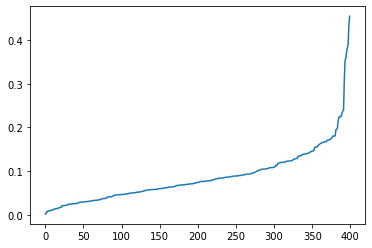

In [18]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [20]:
data

array([[-0.72769596,  1.40300019],
       [-1.87556639,  0.58924743],
       [-0.89104692, -1.39992412],
       [-0.2241146 ,  0.86828942],
       [-0.46540928,  0.30671753],
       [ 0.1706187 ,  0.7849117 ],
       [-1.35218312, -1.04967518],
       [ 1.40958051,  1.1427482 ],
       [-1.22838292,  0.52665395],
       [ 1.88016054,  1.17554199],
       [-1.0105404 ,  1.48563763],
       [-0.66007194,  1.39033334],
       [-0.67106592,  0.19772627],
       [-0.44880825, -0.97081475],
       [-1.3280701 , -0.91154917],
       [-1.21098888, -1.99064858],
       [ 0.67617803,  0.63415316],
       [ 0.41438647,  0.14342744],
       [-0.73358926,  0.20825202],
       [-0.47184883, -0.63900807],
       [ 0.55363081,  0.54107093],
       [-0.63429668,  1.26426672],
       [-1.1688162 ,  0.44821171],
       [-1.73459049,  0.96978963],
       [-0.73455408, -1.16373646],
       [ 1.31119244,  1.31263712],
       [ 1.12353236,  0.59908821],
       [ 0.53461341,  0.14262417],
       [ 0.92904984,